# Resnet - Processing

## Importing Packages

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)
    %run "/content/drive/My Drive/Colab Notebooks/Notebooks/Deep Learning - Processing.ipynb"
except:
    %run "/Google Drive/Colab Notebooks/Notebooks/Deep Learning - Processing.ipynb"

Mounted at /content/drive
In Colab: True
Dataset Folder: /content/drive/My Drive/Colab Notebooks/DataSets/
Experiments Folder: /content/drive/My Drive/Colab Notebooks/Experiments/
     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 757kB 5.6MB/s 
     |████████████████████████████████| 788kB 36.0MB/s 
     |████████████████████████████████| 358kB 42.2MB/s 
     |████████████████████████████████| 358kB 48.9MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
Using Tensorflow 2.3.0
V37


## Models

In [ ]:
from tensorflow.keras.layers import Conv1DTranspose

In [ ]:
def trainModel(n_convolutional, n_features, n_outputs):
    
    # model = Sequential([
    #     Input(shape=(n_timestep, n_convolutional, n_features)),
    #     TimeDistributed(Conv1D(filters=224, kernel_size=3, activation='relu')),
    #     TimeDistributed(BatchNormalization()),
    #     TimeDistributed(SpatialDropout1D(0.15)),
    #     TimeDistributed(Conv1D(filters=224, kernel_size=3, activation='relu')),
    #     TimeDistributed(BatchNormalization()),
    #     TimeDistributed(SpatialDropout1D(0.15)),
    #     TimeDistributed(Flatten()),
    #     Bidirectional(LSTM(units=128, return_sequences=True)),
    #     BatchNormalization(),
    #     Dropout(0.25),
    #     Bidirectional(LSTM(units=128, return_sequences=False)),
    #     BatchNormalization(),
    #     Dropout(0.25),
    #     Dense(128, activation='relu'),
    #     Dense(n_outputs, activation='sigmoid')              
    # ])

    # model = Sequential()
    # model.add(Input(shape=(n_timestep, n_convolutional, n_features)))
    # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    # model.add(TimeDistributed(Dropout(0.5)))
    # model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    # model.add(TimeDistributed(Flatten()))
    # model.add(LSTM(100))
    # model.add(Dropout(0.5))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dense(n_outputs, activation='sigmoid'))

    model = keras.Sequential(
        [
            Input(shape=(n_convolutional, n_features)),
            Conv1D(
                filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            Dropout(rate=0.2),
            Conv1D(
                filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            Conv1DTranspose(
                filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            Dropout(rate=0.2),
            Conv1DTranspose(
                filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
            ),
            Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
            Flatten(),
            Dense(16, activation='relu'),
            Dense(n_outputs, activation='sigmoid') 
        ]
    )
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=['acc'])


    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model, "Test Model"

In [ ]:
def modelParameters(input_shape, output_shape):

    return {
        # "n_timestep": input_shape[1], 
        "n_convolutional": input_shape[1], 
        "n_features": input_shape[2], 
        "n_outputs": output_shape[1]
    }

## Parameters

In [2]:
datasets = getDataSets()

In [ ]:
# (batches, window size, features)
# input_shapes = [
#     # (None, 10, 10, 7),
#     # (None, 20, 10, 7),
#     (None, 30, 10, 7),
#     (None, 40, 10, 7),
#     (None, 50, 10, 7),
# ]

input_shapes = [
    (None, 300, 7),
    (None, 400, 7),
    (None, 500, 7),
]

output_shape = (None, 1)

In [ ]:
batch_size=64
epochs=1000
patience=10
min_delta=0.0001
shuffle=True
num_tests=1

## Tunning Model

In [ ]:
tuner, params = tuneModel(tuningModel, modelParameters, experiment_by_fields[0], experiment_by_dataset[0], input_shapes[2][0], output_shape)

In [ ]:
tuner.search(**params)

In [ ]:
getTunerBestResults(tuner,3)

## Training Model

In [ ]:
getLoadBar()

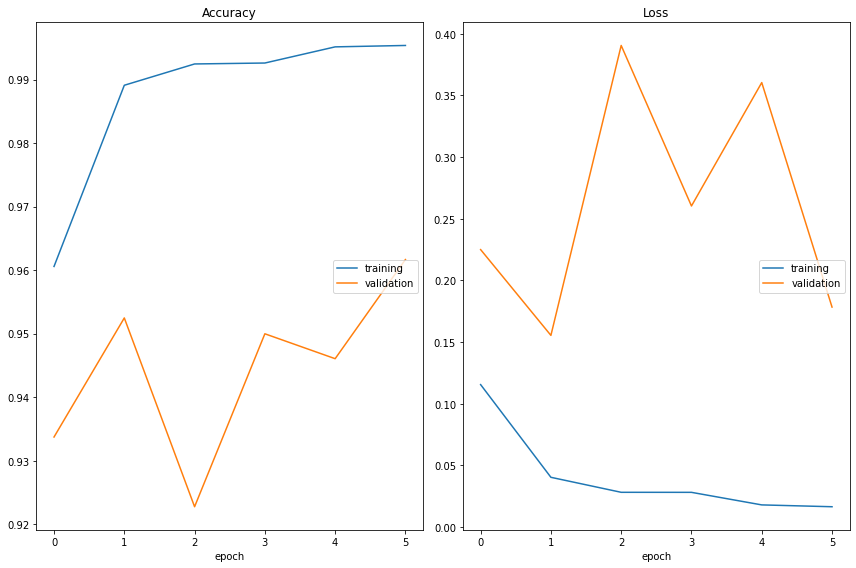

In [ ]:
run(trainModel, modelParameters)

## Results Analysis

In [ ]:
files = [
    'experiment-1-window-700-min-max-scaler-(-1,1)-train-acc-0.99739-val-acc-0.99042.hdf5'   
]

In [ ]:
confusionMatrix(files, "Below Suspension", testModel("CNN Test Model"), (None, 700, 7), (None, 1), experiment_by_fields[0])

In [79]:
import matplotlib.pyplot as plt
import numpy as np

In [192]:
def plot(start, end):
    dataset = "pvs_1"
    side = "left"
    data = datasets[dataset][side][start:end]
    labels = datasets[dataset]["labels"][["irregular_speed_bump", "regular_speed_bump"]][start:end]

    acc_below_suspension = getFields(acc=True, below_suspension=True)
    acc_above_suspension = getFields(acc=True, above_suspension=True)
    acc_dashboard = getFields(acc=True, dashboard=True)

    gyro_below_suspension = getFields(gyro=True, below_suspension=True)
    gyro_above_suspension = getFields(gyro=True, above_suspension=True)
    gyro_dashboard = getFields(gyro=True, dashboard=True)

    x = np.arange(end - start)

    fig = plt.figure(figsize=(14,4))
    ((ax1, ax2, ax3), (ax4, ax5, ax6)) = fig.subplots(2, 3)

    ax1.set_ylabel("Acceleration (m/s²)")
    ax1.plot(x, data[acc_below_suspension])
    ax1.set_title("Near/Below Suspension")
    ax2.plot(x, data[acc_above_suspension])
    ax2.set_title("Near/Above Suspension")
    ax3.plot(x, data[acc_dashboard])
    ax3.set_title("Dashboard")

    ax4.set_ylabel("Rotarion Rate (deg/s)")
    ax4.plot(x, data[gyro_below_suspension])
    ax4.set_xlabel("Number of samples")
    ax5.plot(x, data[gyro_above_suspension])
    ax5.set_xlabel("Number of samples")
    line = ax6.plot(x, data[gyro_dashboard])
    ax6.set_xlabel("Number of samples")
    ax6.legend(line, ("X", "Y", "Z"), loc="lower right")

    # fig.legend(line, ("X", "Y", "Z"), loc="lower center", mode = "expand", ncol = 3, bbox_to_anchor=(0.45,0))
    # fig.legend(line, ("X", "Y", "Z"), loc="upper left", ncol = 1, bbox_to_anchor=(1.005,1.15))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    # for ax in fig.get_axes():
    #     ax.label_outer()

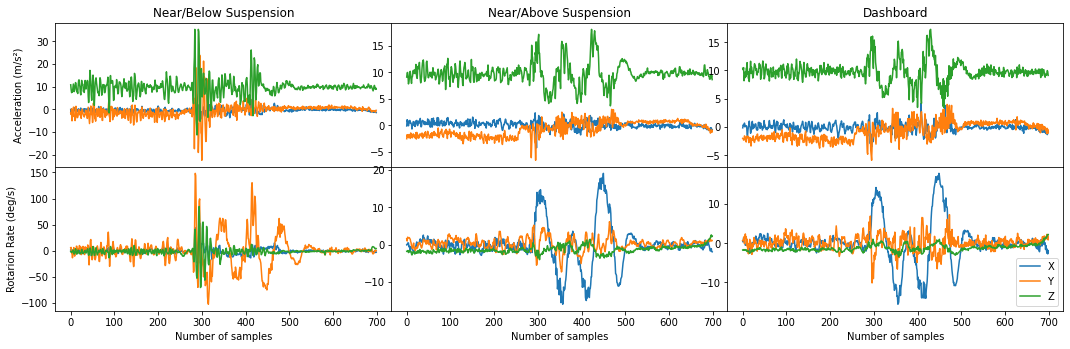

In [211]:
# Asfalto
start = 29600 # 119400
end = 30300 # 120150
plot(start, end)
plt.savefig("speed_bump_asphalt", bbox_inches = "tight")

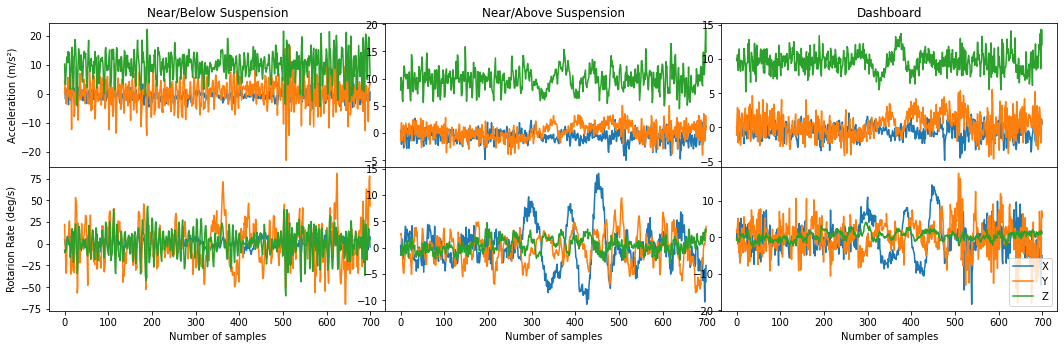

In [212]:
# Cobblestone
# plot(45500, 46200)
# plot(51000, 51700)
plot(53800, 54500)
plt.savefig("speed_bump_cobblestone", bbox_inches = "tight")

In [265]:
labels = datasets["pvs_9"]["labels"][["no_speed_bump", "irregular_speed_bump", "regular_speed_bump"]]

In [266]:
len(labels[labels["regular_speed_bump"] == 1])

308

In [267]:
len(labels[labels["irregular_speed_bump"] == 1])

335

In [268]:
len(labels[labels["no_speed_bump"] == 1])

90914

In [269]:
len(labels)

91555